In [1]:
# load vgg model
from keras.applications import vgg16
# load the model
model = vgg16.VGG16()
# summarize the model
model.summary()

2022-10-19 14:45:38.494372: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
# summarize filters in each convolutional layer
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


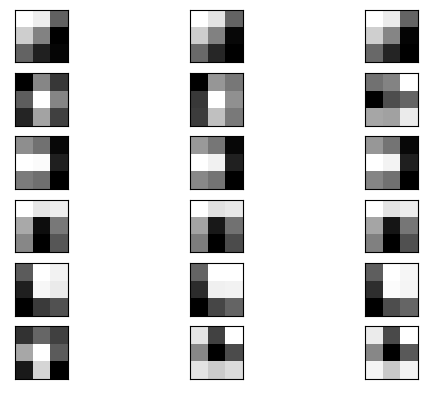

In [3]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

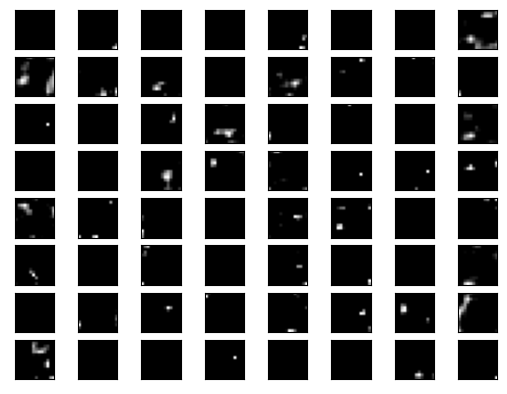

In [4]:

# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array 

# from keras.utils import load_img
# from keras.utils import img_to_array

from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]

outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
# img = load_img('draak.webp', target_size=(224, 224))
img = load_img('Emma.jpeg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
#img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)


# plot the output from each block
square = 8

for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	# pyplot.show()

In [5]:
# Print prediction 
from keras.applications import vgg16
model = vgg16.VGG16()
predict_img = model.predict(img)
predict_img

array([[1.78616339e-08, 4.96493016e-08, 1.03102868e-08, 8.03221845e-09,
        1.65099962e-07, 2.99280138e-08, 4.47378632e-08, 9.81900925e-08,
        2.68774407e-08, 3.27588040e-10, 2.54290228e-10, 9.18270460e-10,
        1.73837167e-09, 1.95984207e-09, 1.88285365e-09, 6.33805064e-10,
        1.99130890e-09, 5.21055865e-09, 1.47659518e-09, 1.57318993e-08,
        1.03028908e-09, 1.39427687e-08, 1.37526550e-08, 6.62204691e-09,
        1.45986077e-08, 2.06800888e-09, 3.59418340e-09, 2.35929214e-08,
        2.29426647e-08, 3.69862789e-08, 2.47336018e-09, 8.93236329e-09,
        9.28797572e-09, 4.44939552e-09, 4.33689307e-09, 2.58672483e-09,
        1.01800861e-08, 1.31888367e-09, 1.24073130e-09, 2.96929459e-09,
        8.23966850e-09, 1.21847754e-09, 1.30200006e-09, 7.08675829e-09,
        1.94559946e-09, 3.60156038e-09, 1.31564075e-08, 1.76754311e-09,
        1.54123148e-09, 2.26187222e-10, 3.81709553e-09, 3.13673425e-08,
        2.53211656e-08, 1.20324000e-08, 7.42246931e-09, 2.719198

In [6]:
#Let's predict top 5 results
top_five_predict = vgg16.decode_predictions(predict_img, top=5)
top_five_predict

[[('n04584207', 'wig', 0.944083),
  ('n02869837', 'bonnet', 0.03589565),
  ('n03325584', 'feather_boa', 0.0026064839),
  ('n03630383', 'lab_coat', 0.0024267153),
  ('n03814639', 'neck_brace', 0.0019399453)]]